In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
dataset = pd.read_csv('https://raw.githubusercontent.com/nikitaa30/Content-based-Recommender-System/master/sample-data.csv')
dataset.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   description  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [3]:
dataset['description'] = dataset['description'].astype('str')

In [4]:
description_corpus = ' '.join(dataset['description'])

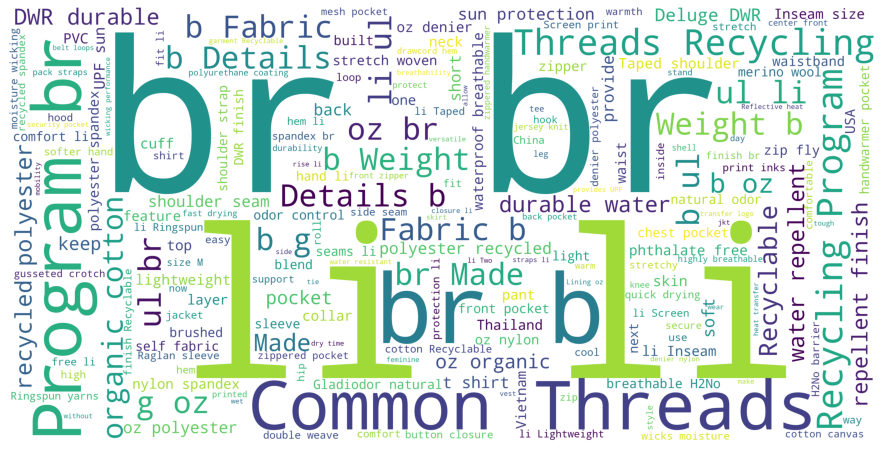

In [5]:
from wordcloud import WordCloud, STOPWORDS
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dataset['description'])
tfidf_matrix.shape

(500, 52262)

In [7]:
tf.vocabulary_

{'active': 1880,
 'classic': 7604,
 'boxers': 5039,
 'reason': 35739,
 'cult': 10820,
 'favorite': 15509,
 'cool': 9573,
 'especially': 14281,
 'sticky': 43184,
 'situations': 40566,
 'quick': 35168,
 'drying': 12871,
 'lightweight': 26140,
 'underwear': 47589,
 'takes': 45323,
 'minimal': 28697,
 'space': 42294,
 'travel': 46755,
 'pack': 31186,
 'exposed': 14518,
 'brushed': 5850,
 'waistband': 48776,
 'offers': 30405,
 'skin': 40731,
 'softness': 42100,
 'panel': 31545,
 'construction': 9247,
 'traditional': 46581,
 'boxer': 5028,
 'fit': 16361,
 'functional': 17976,
 'fly': 17250,
 'oz': 31038,
 '100': 42,
 'recycled': 35796,
 'polyester': 33625,
 'moisture': 28941,
 'wicking': 50605,
 'performance': 32245,
 'inseam': 21612,
 'size': 40571,
 'recyclable': 35766,
 'common': 8850,
 'threads': 45954,
 'recycling': 35950,
 'program': 34426,
 'br': 5073,
 'details': 11750,
 'ul': 47274,
 'li': 24030,
 'silky': 40336,
 'capilene': 6556,
 'fabric': 14759,
 'ultralight': 47449,
 'breathabl

In [8]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.10110642, 0.06487353, 0.05420526],
       [0.10110642, 1.        , 0.4181664 , 0.0545398 ],
       [0.06487353, 0.4181664 , 1.        , 0.05003225],
       [0.05420526, 0.0545398 , 0.05003225, 1.        ]])

In [17]:
cosine_sim.shape

(500, 500)

In [19]:
list(enumerate(cosine_sim[1]))

[(0, 0.10110641701157388),
 (1, 1.0000000000000013),
 (2, 0.41816639921615745),
 (3, 0.0545398046647213),
 (4, 0.05834020998290559),
 (5, 0.040263737094215636),
 (6, 0.04385471731852819),
 (7, 0.03278433648798469),
 (8, 0.037040400274857076),
 (9, 0.02732734762771394),
 (10, 0.06500157684278204),
 (11, 0.05229771071413641),
 (12, 0.03012620663034884),
 (13, 0.0355297346599744),
 (14, 0.058503855781011686),
 (15, 0.06339524469012964),
 (16, 0.025238120947465366),
 (17, 0.08554429761597016),
 (18, 0.11546382098627585),
 (19, 0.04737431614734676),
 (20, 0.045557523688902896),
 (21, 0.05275646768903509),
 (22, 0.05485522756610832),
 (23, 0.04409105511847831),
 (24, 0.06482508570323896),
 (25, 0.048971012132911544),
 (26, 0.03881099674319423),
 (27, 0.03892789896439545),
 (28, 0.050927055953333404),
 (29, 0.050311535877241874),
 (30, 0.028499993685260655),
 (31, 0.059287302649629385),
 (32, 0.027628329334085235),
 (33, 0.062149648081403525),
 (34, 0.036323439107342426),
 (35, 0.042594572975

In [22]:
def recommendations(idx):
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    description_indices = [i[0] for i in sim_scores]
    return dataset.iloc[description_indices]

In [23]:
results = recommendations(1)

In [26]:
print(results['description'][:165])

2      Active sport briefs - These superbreathable no...
18     Cap 1 boxer briefs - On bivy or belay, the for...
493    Active boxer briefs - A no-fuss travel compani...
299    Active briefs - Whether you're beating the hea...
298    Active boy shorts - We've worn these versatile...
Name: description, dtype: object


In [10]:
#cosine_sim[0].argsort()[:-100:-1]
dataset['id'][0]

1

In [11]:
results = {}
for idx, row in dataset.iterrows():
    similar_indices = cosine_sim[idx].argsort()[:-100:-1]
    similar_items = [(cosine_sim[idx][i], dataset['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [12]:
def recommend(item_id, num):
    recs = results[item_id][:num]
    for rec in recs:
        desc   = dataset.loc[dataset['id'] == rec[1]]['description'].tolist()[0].split(' // ')[:1][:165]
        print('\nRecommended: ')
        print(desc)

In [13]:
dataset[:1]['description']

0    Active classic boxers - There's a reason why o...
Name: description, dtype: object

In [14]:
recommend(1,5)


Recommended: 
['Cap 1 boxer briefs - On bivy or belay, the form-fitting Capilene 1 Boxer Briefs stay dry and comfortable. Made from 100% recycled polyester, the underwear excels at moisture-wicking and has Gladiodor natural odor control for the garment. Exposed elastic waistband is brushed for softness; the hem is coverstitched for a smooth glide beneath shorts or pants. Fully-functioning fly and supportive front panel keep you covered. 5 1/2" inseam (size M). Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Moisture-wicking Capilene 1 fabric with Gladiodor for exceptional next-to-skin comfort and natural odor control for the garment</li> <li>Brushed elastic waistband</li> <li>Supportive front panel</li> <li>"Cover-stitched hem for smooth glide under shorts or pants, won\'t restrict mobility"</li> <li>"Inseam (size M) is 5 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor&#174; natural odor control for the g